S Harisankar | Date: 14-11-22

## Import stuff

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.neural_network import MLPClassifier

In [17]:
df = pd.read_csv('./datasets/diabetes.csv')
print(df.shape)
df.describe().transpose()

(768, 9)


,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [18]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

## preprocessing

In [19]:
#Extracting Independent and dependent Variable

y=df['Outcome']
print(y)
df=df.drop(['Outcome'],axis=1)
x= df
print(x)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70      

In [20]:
#splitting into training and test dataset

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)
print(x_train.shape)
print(x_test.shape)

(537, 8)
(231, 8)


In [21]:
#feature scaling

from sklearn.preprocessing import MinMaxScaler
st_x = MinMaxScaler()
x_train = st_x.fit_transform(x_train)
x_test = st_x.fit_transform(x_test)
print(x_train)

[[0.         0.76262626 0.73770492 ... 0.62742176 0.12285959 0.        ]
 [0.05882353 0.41919192 0.55737705 ... 0.27123696 0.23116438 0.1       ]
 [0.11764706 0.61616162 0.57377049 ... 0.54843517 0.10958904 0.1       ]
 ...
 [0.23529412 0.47474747 0.53278689 ... 0.3681073  0.02739726 0.        ]
 [0.64705882 0.42929293 0.60655738 ... 0.4485842  0.09246575 0.23333333]
 [0.29411765 0.68686869 0.67213115 ... 0.         0.2380137  0.8       ]]


## instantiate model

In [34]:
#no of hidden layers is 3
#no of neurons in each layer is 8

classifier = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=1000)
classifier.fit(x_train,y_train)

x_pred = classifier.predict(x_train)
y_pred = classifier.predict(x_test)

In [35]:
print(y_test.values)
print(y_pred)

[1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 1 1 1 0 0 1 1 1 1 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0
 1 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0
 0 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 1 1
 0 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0
 1 1 0 0 1 1 0 0 0]
[1 0 0 1 0 0 1 1 1 0 1 1 0 0 0 1 1 0 0 1 1 0 1 0 0 1 0 1 0 0 1 1 0 1 0 1 1
 0 1 1 0 0 0 1 1 0 0 0 1 0 1 0 1 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 0 0 0 0 1
 1 1 0 1 0 0 1 1 1 0 0 0 0 1 1 0 0 0 0 0 1 0 1 1 1 1 1 0 0 0 1 1 0 0 0 1 0
 0 1 1 1 1 0 1 0 1 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 1 0 1 1 0 0 1 0 0 1 0 0 0
 0 0 0 1 0 0 1 0 1 0 0 1 1 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1
 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0
 1 1 1 1 1 0 0 0 1]


## confusion matrix

In [36]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, y_pred)
print(cm)

[[116  41]
 [ 15  59]]


In [37]:
from sklearn.metrics import confusion_matrix
cm1= confusion_matrix(y_train, x_pred)
print(cm1)

[[297  46]
 [ 65 129]]


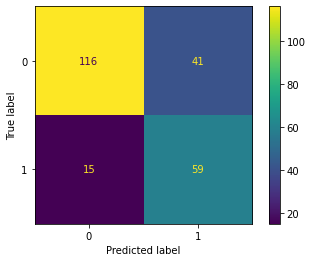

In [38]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
display_labels=classifier.classes_)
disp.plot()

## testing accuracy

In [39]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy score: {}'.format(accuracy_score(y_test, y_pred)))
print('Precision score: {}'.format(precision_score(y_test, y_pred,pos_label=0)))
print('Recall score: {}'.format(recall_score(y_test, y_pred,pos_label=0)))
print('F1 score: {}'.format(f1_score(y_test, y_pred,pos_label=0)))

Accuracy score: 0.7575757575757576
Precision score: 0.8854961832061069
Recall score: 0.7388535031847133
F1 score: 0.8055555555555556


In [41]:
classifier.coefs_

[array([[-1.85452830e-01, -2.70322828e-01,  8.06040489e-01,
         -2.69806400e-27,  4.34328411e-05, -4.91674377e-30,
          9.10826777e-02, -9.01427436e-06],
        [-8.06684673e-01, -6.98237527e-01,  3.72666900e-02,
         -1.08873176e-17, -1.38638741e-20, -1.78687489e-45,
         -4.61978544e-01, -2.24497231e-08],
        [-3.66436783e-02,  3.98240930e-01, -6.81639941e-01,
         -3.11146593e-05, -3.53813230e-05, -5.87479976e-05,
          3.36399733e-01,  3.80203270e-41],
        [ 1.12935825e-02, -6.43010062e-01, -1.75468928e-01,
         -7.61263230e-05, -6.96055095e-35,  1.44381215e-15,
          9.39433870e-02, -1.04237029e-07],
        [-1.29980211e-01,  2.75761851e-01, -1.43436798e-01,
          1.75168430e-06, -6.27930760e-37, -7.59568910e-43,
          1.94120183e-01,  9.09690197e-13],
        [-3.91829811e-01, -3.12400261e-01, -7.10827837e-01,
          1.48889872e-42,  7.61459482e-40, -2.96377120e-17,
         -5.86135729e-01,  2.63682370e-10],
        [-1.5051

In [42]:
classifier.intercepts_

[array([ 1.07623571,  0.76562062,  0.26088282, -0.6011228 , -0.57650866,
        -0.40151669,  0.67470026, -0.59474147]),
 array([-0.28602168, -0.09551671, -0.29096436, -0.55067662, -0.35729907,
         0.80335158,  0.1266103 , -0.16963774]),
 array([ 0.17852918, -0.56020292,  0.58817512,  0.66823711, -0.07619526,
        -0.51297773,  0.07935468, -0.19191457]),
 array([0.8070265])]